In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [2]:
# Încărcarea setului de date
file_path = "seeds_dataset.txt"  # Asigură-te că fișierul este în același director
column_names = [
    "area", "perimeter", "compactness", "length_of_kernel",
    "width_of_kernel", "asymmetry_coefficient", "length_of_kernel_groove", "class"
]

df = pd.read_csv(file_path, delim_whitespace=True, header=None, names=column_names)

In [3]:
# Prelucrarea datelor
X = df.drop(columns=["class"])  # Excluderea coloanei cu clasele
y = df["class"]  # Salvarea etichetelor reale

In [4]:
# Normalizarea datelor
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
# Aplicarea algoritmului K-means
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["KMeans_Cluster"] = kmeans.fit_predict(X_scaled)

C:\Users\HP\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\HP\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [6]:
# Aplicarea clusteringului ierarhic
hierarchical = AgglomerativeClustering(n_clusters=3)
df["Hierarchical_Cluster"] = hierarchical.fit_predict(X_scaled)


In [7]:

# Evaluarea performanței clusteringului
kmeans_silhouette = silhouette_score(X_scaled, df["KMeans_Cluster"])
hierarchical_silhouette = silhouette_score(X_scaled, df["Hierarchical_Cluster"])

print(f"K-means Silhouette Score: {kmeans_silhouette:.4f}")
print(f"Hierarchical Clustering Silhouette Score: {hierarchical_silhouette:.4f}")


K-means Silhouette Score: 0.4007
Hierarchical Clustering Silhouette Score: 0.3926


In [8]:
# Compararea clusterelor ierarhice cu clasele reale
comparison_hierarchical = df.groupby(["class", "Hierarchical_Cluster"]).size().unstack(fill_value=0)
print("\nComparare Hierarchical Clustering cu clasele reale:")
print(comparison_hierarchical)


Comparare Hierarchical Clustering cu clasele reale:
Hierarchical_Cluster   0   1   2
class                           
1                     64   4   2
2                      4  66   0
3                      5   0  65


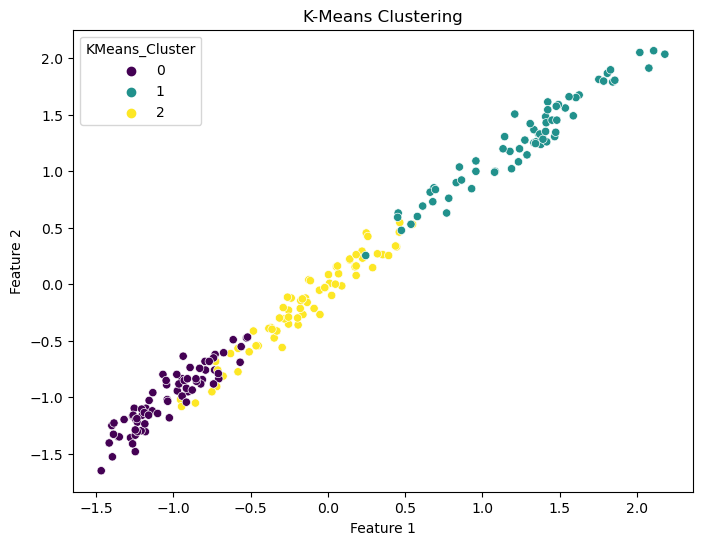

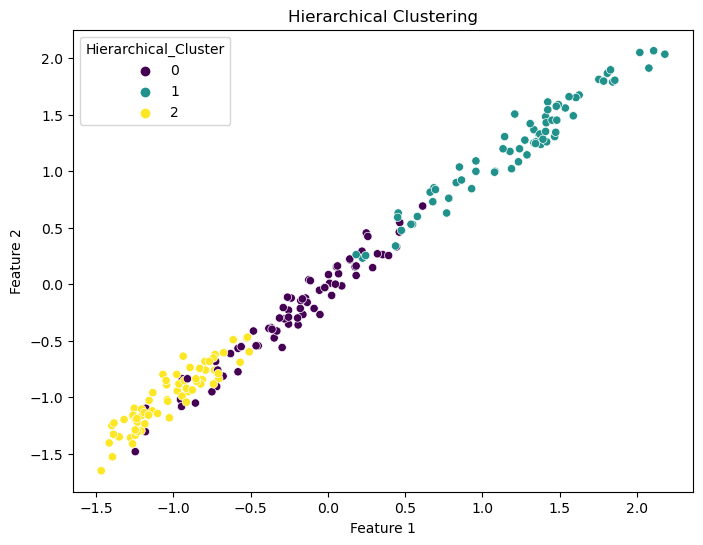

In [9]:
# Vizualizarea clusterelor K-means
def plot_clusters(X, labels, title):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette="viridis", legend='full')
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

plot_clusters(X_scaled, df["KMeans_Cluster"], "K-Means Clustering")
plot_clusters(X_scaled, df["Hierarchical_Cluster"], "Hierarchical Clustering")

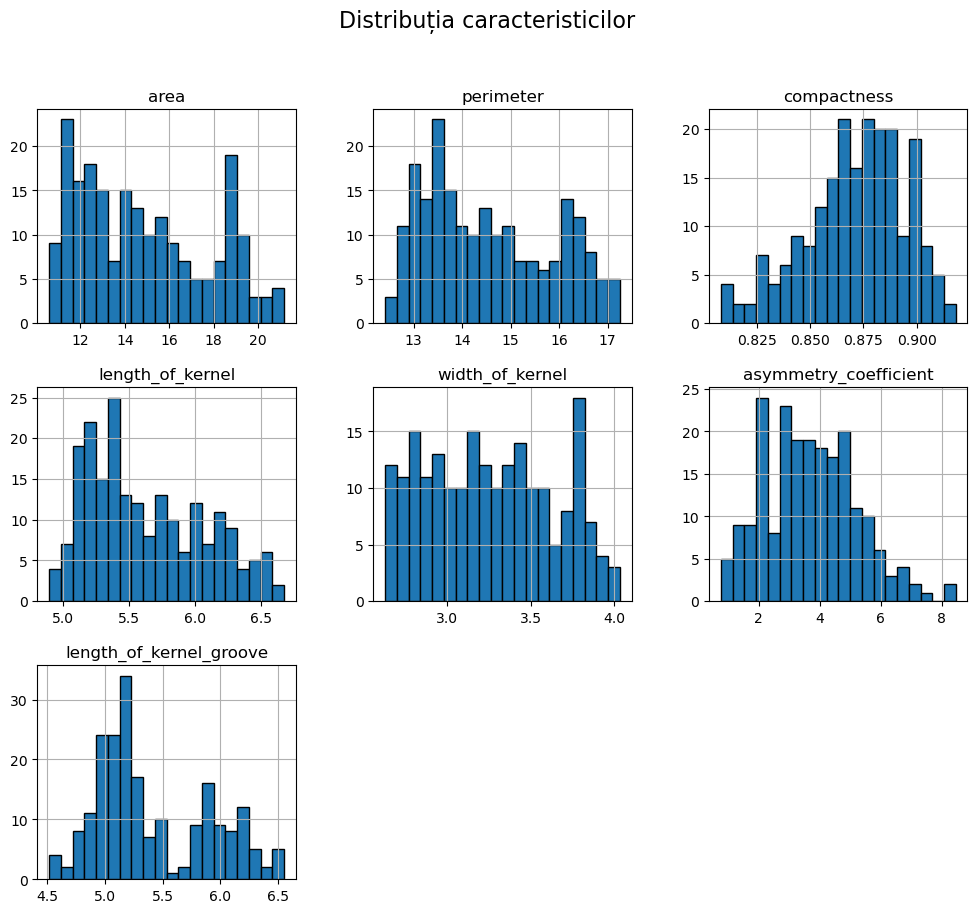

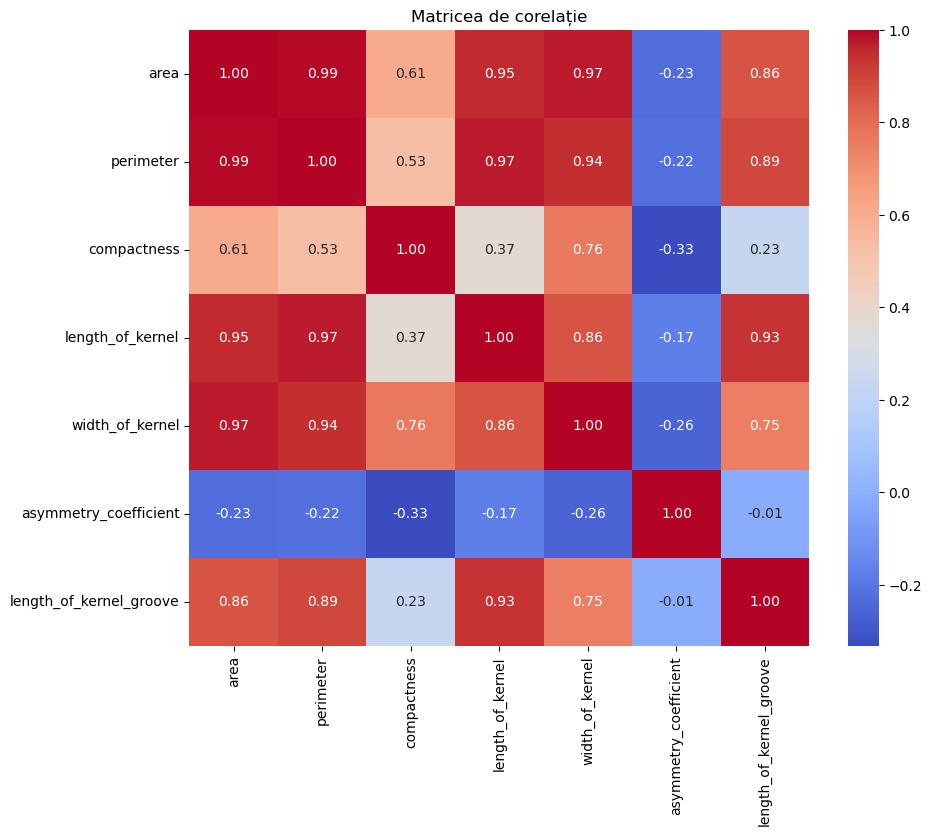

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


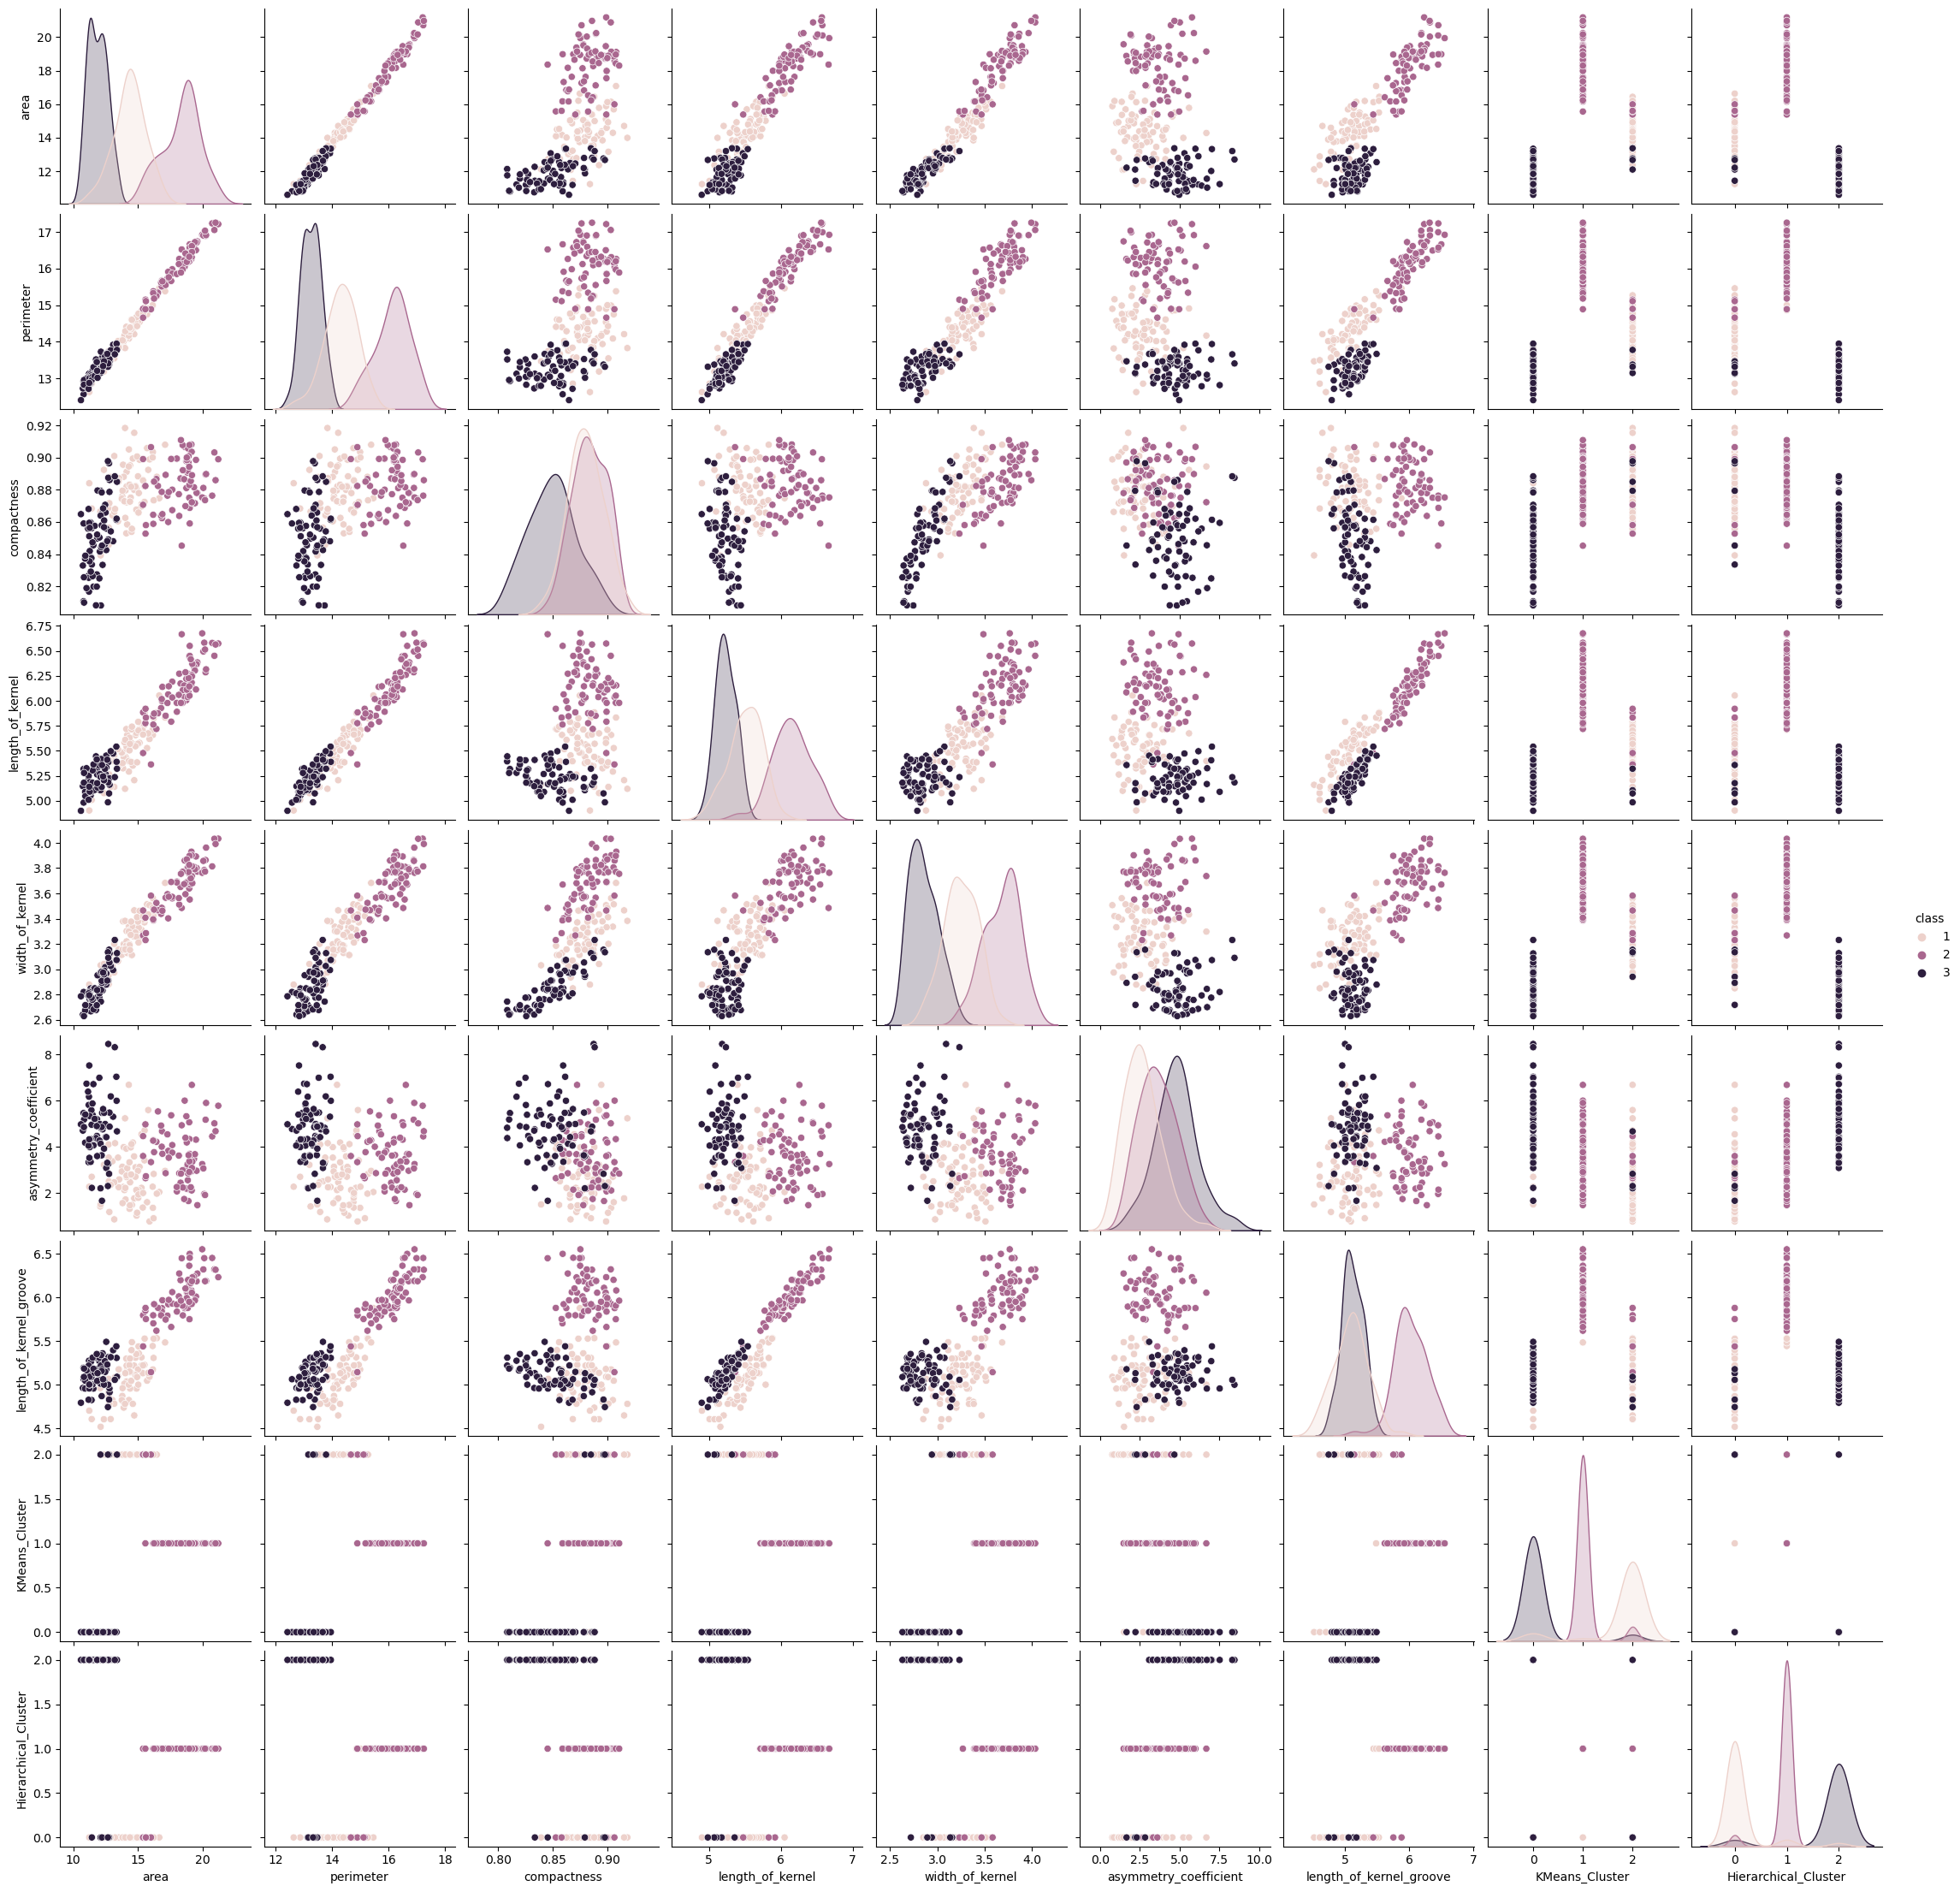

In [10]:
# Histograme pentru fiecare caracteristică
df.drop(columns=["class", "KMeans_Cluster", "Hierarchical_Cluster"]).hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.suptitle("Distribuția caracteristicilor", fontsize=16)
plt.show()

# Matricea de corelație
plt.figure(figsize=(10, 8))
sns.heatmap(df.drop(columns=["class", "KMeans_Cluster", "Hierarchical_Cluster"]).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matricea de corelație")
plt.show()

# Pairplot pentru vizualizarea relațiilor între variabile
sns.pairplot(df, hue="class", diag_kind="kde")
plt.show()

In [11]:
# Compararea clusterelor K-means cu clasele reale
comparison_kmeans = df.groupby(["class", "KMeans_Cluster"]).size().unstack(fill_value=0)
print("\nComparare K-Means cu clasele reale:")
print(comparison_kmeans)


Comparare K-Means cu clasele reale:
KMeans_Cluster   0   1   2
class                     
1                6   2  62
2                0  65   5
3               66   0   4
